In [80]:
# Package Imports - feel free to add what you think might be useful! 
# %pip install requests
import requests
import numpy as np
import matplotlib.pyplot as plt
import time

## Task 3: Quest for Quantum Randomness

### Part A: Truly Different

In [ ]:
""" 
Using the QRNGaaS User Manual provided, 
write Python code to get random numbers from IDQuantique's Quantum Random Number Generators. 

The API documentation is available at: https://drive.google.com/file/d/1OkyRUP7HC4dbmi8OvoT4EuvXqRVGdsjD/view
You'll probably reuse this code for Task 4. So write it well!

If you are unfamiliar with writing HTTP requests in Python, 
https://www.w3schools.com/python/module_requests.asp

If you're really stuck, this can definitely help. Though we encourage you to read the documentation yourself! 
https://curlconverter.com/python/
"""

In [2]:
"""
To get started, we provide a simple example of how to use the API to generate 10 int16 random numbers.
In particular, observe where we pass in the min and max parameters to specify the range of random numbers we want
and the quantity parameter to specify how many random numbers we want.
Here is the API KEY you will need to use: aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI
"""

!curl "https://qrng.idqloud.com/api/1.0/short?max=32767&min=-32768&quantity=10" -X GET -H "X-API-KEY: aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI"

{"data":[-12537,-19793,18998,-2528,-7753,-12767,-27980,1933,-30274,-27491],"dataType":"int16"}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100    94  100    94    0     0     36      0  0:00:02  0:00:02 --:--:--    36


In [42]:
#comverting the curl command to python
#curl "https://qrng.idqloud.com/api/1.0/short?max=32767&min=-32768&quantity=10" -X GET -H "X-API-KEY: aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI"

def get_data(quantity, min, max):
    # url = f"https://qrng.idqloud.com/api/1.0/int?max={max}&min={min}&quantity={quantity}"
    url = f"https://qrng.idqloud.com/api/1.0/int?max={max}&min={min}&quantity={quantity}"
    headers = {
        "X-API-KEY": "aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()['data']
    else:
        print(f"Error: {response.status_code}")
        return None


Maximum entropy: 7.983464063274566. Argmax: 481


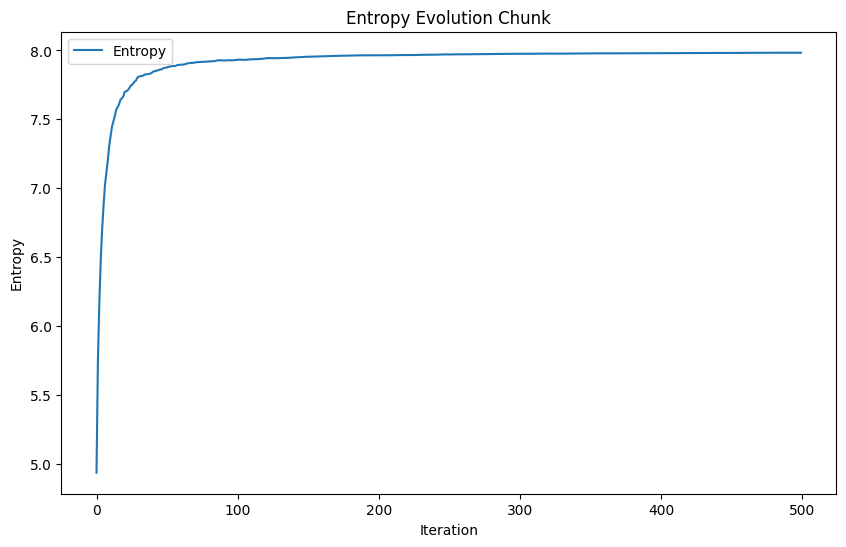

In [ ]:
"""
You can paste the other environmental entropy based TRNGs from Task 2 and compare the performance
Compare your written QRNG to the previous TRNGs. Be sure to compare them with respect to bitrate and entropy.
"""

def compute_entropy(X):
    """ 
    You can pass in the random variable X in whatever form you choose.
    One way to represent a random variable is as a dictionary, 
    where each (key, value) pair represents an outcome x 
    and its probability P(X = x)

    Hint: NumPy might be helpful here!
    """
    #construct the probability distribution
    # probabilities = np.array([np.sum(X == x) for x in np.unique(X)])
    _,probabilities = np.unique(X, return_counts=True)
    probabilities =np.array(probabilities)/ len(X)
    
    #compute the shannon-entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy
    # pass # TODO: copmute Shannon Entropy or Min Entropy

def plot_entropy(num_calls=30):
    sequence = []
    entropies = []
    for i in range(num_calls):
        data = get_data(32, 0, 255)
        if data is not None:
            sequence.extend(data)
        else:
            print("Failed to retrieve data")
            break
        entropy = compute_entropy(sequence)
        entropies.append(entropy)
    print(f'Maximum entropy: {max(entropies)}. Argmax: {np.argmax(entropies)}')
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_calls), entropies, label='Entropy')
    plt.title('Entropy Evolution Chunk')
    plt.xlabel('Iteration')
    plt.ylabel('Entropy')
    plt.legend()
    plt.show()
        
    
    # pass # TODO




plot_entropy(500)



In [82]:
def get_bitrate():
    # TODO
    number_of_data = 32
    time_start = time.perf_counter_ns()
    data = get_data(number_of_data, -2147483648, -2147483647)
    time_end = time.perf_counter_ns()
    
    elapsed_time = (time_end - time_start)/1e9
    data_received_bits = 8 * 4 * number_of_data
    data_rate = data_received_bits / elapsed_time
    return data_rate, elapsed_time, data_received_bits

mean = 0
data = []

for i in range(100):
    data_rate, _, _ = get_bitrate()
    mean += data_rate
    data.append(data_rate)
mean /= 100
std = np.std(data)
print(f"Data rate: {mean/1000} kbps. Standard deviation: {std/1000} kbps")

Data rate: 5.074076906701571 kbps. Standard deviation: 0.710962007743203 kbps


### Part B: Easy as Pi!

In [ ]:
"""
Implement the Monte Carlo algorithm for estimating Pi using your various sources of randomness. 

If you are stuck on how to implement the algorithm: 
https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/
"""
def estimate_pi():
    pass # TODO